In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/border-gavaskar-trophy-results/BGTresults.csv


In [2]:
df=pd.read_csv("/kaggle/input/border-gavaskar-trophy-results/BGTresults.csv")
df.head(5)

,Test Series Year,Test Number,Innings,Venue,Host,Highest Scorer,Team,Runs by highest scorer,best bowler,wickets by best bowler,team total,Winner,Win Margin,MOTM,Ind captain,Aus captain,MOTS,Series Win
0,1996-97,1,1,Delhi,India,Michael Slater,Australia,44,Anil Kumble,4.0,182/10,India,7w,Nayan Mongia,Sachin Tendulkar,Mark Taylor,Nayan Mongia,India
1,1996-97,1,2,Delhi,India,Nayan Mongia,India,152,Paul Reiffel,3.0,361/10,India,7w,Nayan Mongia,Sachin Tendulkar,Mark Taylor,Nayan Mongia,India
2,1996-97,1,3,Delhi,India,Steve Waugh,Australia,67,Anil Kumble,5.0,234/10,India,7w,Nayan Mongia,Sachin Tendulkar,Mark Taylor,Nayan Mongia,India
3,1996-97,1,4,Delhi,India,Mohd. Azharuddin,India,21,Paul Reiffel,2.0,56/3,India,7w,Nayan Mongia,Sachin Tendulkar,Mark Taylor,Nayan Mongia,India
4,1997-98,1,1,Chennai,India,Navjot Sidhu,India,62,Shane Warne,4.0,257/10,India,179r,Sachin Tendulkar,Mohd. Azharuddin,Mark Taylor,Sachin Tendulkar,India


## We can see that the winner are displayed for every inning so we can't use value count directly we need to Group the Data according to Test Series Year and Test Number

In [3]:
df1=df.groupby(["Test Series Year","Test Number"])["Winner","Host"].first()
df1=df1.reset_index()
df1.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Test Series Year,Test Number,Winner,Host
0,1996-97,1,India,India
1,1997-98,1,India,India
2,1997-98,2,India,India
3,1997-98,3,Australia,India
4,1999-00,1,Australia,Australia


Text(0.5, 0, 'NO. OF MATCHES')

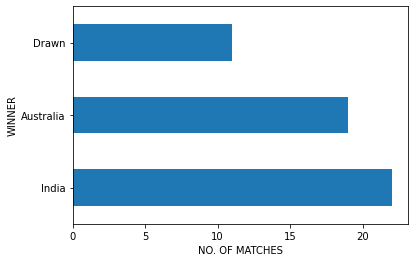

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
df1["Winner"].value_counts().plot(kind="barh")
plt.ylabel("WINNER")
plt.xlabel("NO. OF MATCHES")

# India has won more matches than Australia

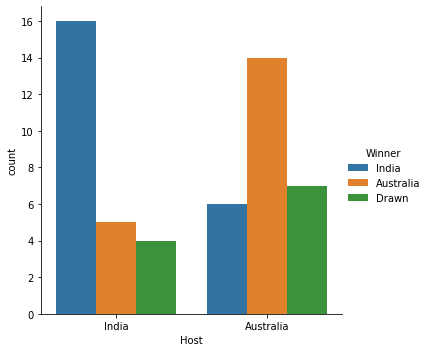

In [5]:
sns.catplot(x="Host",hue="Winner",kind="count",data=df1)

# India are dominating at Home while most of the matches at Australia are without Result

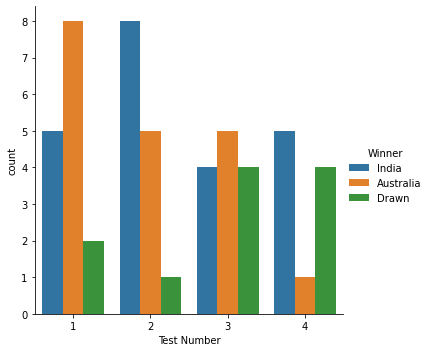

In [6]:
sns.catplot(x="Test Number",hue="Winner",kind="count",data=df1)

# It is seen that Australia mostly takes lead at the First Match but India is ready with a comeback

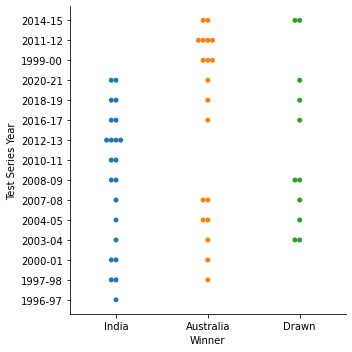

In [7]:
sns.catplot(x="Winner",y="Test Series Year",kind="swarm",data=df1)

# We can See that in the latest series Australia were Dominating

Text(0, 0.5, 'Total Innings')

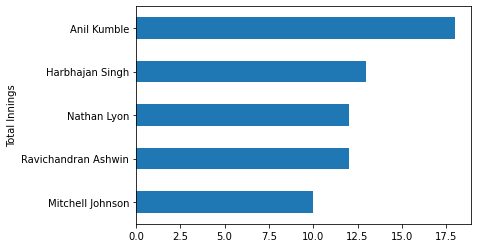

In [8]:
df.groupby("best bowler")["best bowler"].count().sort_values().tail().plot(kind="barh")
plt.ylabel("Total Innings")

# Spin Dominationg
##  It is very interesting that Top 4 out of 5 are spinners and among the 4 spinners 3 are Indians

<AxesSubplot:ylabel='Highest Scorer'>

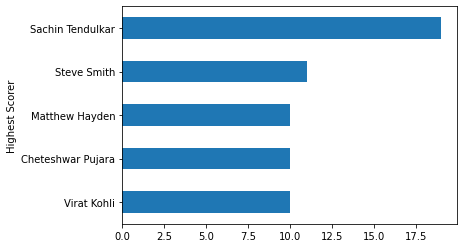

In [9]:
df.groupby("Highest Scorer")["Highest Scorer"].count().sort_values().tail().plot(kind="barh")

# Sachin Sir on the top

<AxesSubplot:ylabel='MOTM'>

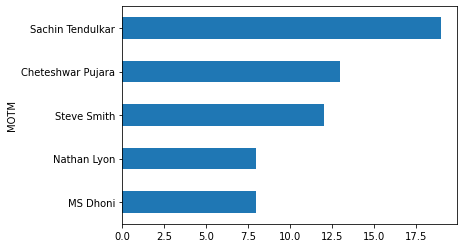

In [10]:
df.groupby("MOTM")["MOTM"].count().sort_values().tail().plot(kind="barh")

# Most Man of the Matches are taken by Batsman

<AxesSubplot:ylabel='MOTS'>

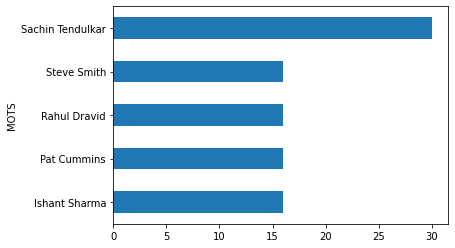

In [11]:
df.groupby("MOTS")["MOTS"].count().sort_values().tail().plot(kind="barh")

# Man of the Series

In [12]:
df.head()

,Test Series Year,Test Number,Innings,Venue,Host,Highest Scorer,Team,Runs by highest scorer,best bowler,wickets by best bowler,team total,Winner,Win Margin,MOTM,Ind captain,Aus captain,MOTS,Series Win
0,1996-97,1,1,Delhi,India,Michael Slater,Australia,44,Anil Kumble,4.0,182/10,India,7w,Nayan Mongia,Sachin Tendulkar,Mark Taylor,Nayan Mongia,India
1,1996-97,1,2,Delhi,India,Nayan Mongia,India,152,Paul Reiffel,3.0,361/10,India,7w,Nayan Mongia,Sachin Tendulkar,Mark Taylor,Nayan Mongia,India
2,1996-97,1,3,Delhi,India,Steve Waugh,Australia,67,Anil Kumble,5.0,234/10,India,7w,Nayan Mongia,Sachin Tendulkar,Mark Taylor,Nayan Mongia,India
3,1996-97,1,4,Delhi,India,Mohd. Azharuddin,India,21,Paul Reiffel,2.0,56/3,India,7w,Nayan Mongia,Sachin Tendulkar,Mark Taylor,Nayan Mongia,India
4,1997-98,1,1,Chennai,India,Navjot Sidhu,India,62,Shane Warne,4.0,257/10,India,179r,Sachin Tendulkar,Mohd. Azharuddin,Mark Taylor,Sachin Tendulkar,India


In [13]:
df2=df.groupby(["Test Series Year","Test Number"])["Winner","Ind captain","Aus captain"].first()
df2=df2.reset_index()
df2.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Test Series Year,Test Number,Winner,Ind captain,Aus captain
0,1996-97,1,India,Sachin Tendulkar,Mark Taylor
1,1997-98,1,India,Mohd. Azharuddin,Mark Taylor
2,1997-98,2,India,Mohd. Azharuddin,Mark Taylor
3,1997-98,3,Australia,Mohd. Azharuddin,Mark Taylor
4,1999-00,1,Australia,Sachin Tendulkar,Steve Waugh


<AxesSubplot:ylabel='Ind captain'>

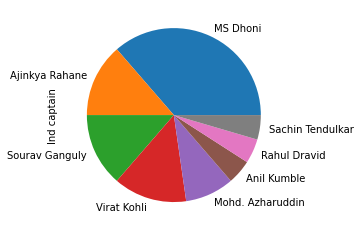

In [14]:
ind_W=df2[df2["Winner"]=="India"]
ind_W.groupby("Ind captain")["Ind captain"].count().sort_values(ascending=False).plot(kind="pie")

# India won most of their matches under Dhoni's captaincy

<AxesSubplot:ylabel='Aus captain'>

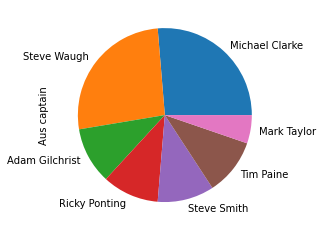

In [15]:
aus_W=df2[df2["Winner"]=="Australia"]
aus_W.groupby("Aus captain")["Aus captain"].count().sort_values(ascending=False).plot(kind="pie")

# Australia won most of their matches under Michael Clarke and Steve Waugh captaincy

In [16]:
# Calculating Score for every inning
Runs=[]
Wics=[]
run_wic=df['team total'].str.split("/").tolist()
for runs,wics in run_wic:
    Runs.append(runs)
    Wics.append(wics)

In [17]:
#Adding runs and Wickets to DataFrame
df["RUNS"]=Runs
df["WICKETS"]=Wics
df.drop("team total",axis=1)
df["RUNS"]=df["RUNS"].astype('int32')
df["WICKETS"]=df["WICKETS"].astype('int32')
df.head()

,Test Series Year,Test Number,Innings,Venue,Host,Highest Scorer,Team,Runs by highest scorer,best bowler,wickets by best bowler,team total,Winner,Win Margin,MOTM,Ind captain,Aus captain,MOTS,Series Win,RUNS,WICKETS
0,1996-97,1,1,Delhi,India,Michael Slater,Australia,44,Anil Kumble,4.0,182/10,India,7w,Nayan Mongia,Sachin Tendulkar,Mark Taylor,Nayan Mongia,India,182,10
1,1996-97,1,2,Delhi,India,Nayan Mongia,India,152,Paul Reiffel,3.0,361/10,India,7w,Nayan Mongia,Sachin Tendulkar,Mark Taylor,Nayan Mongia,India,361,10
2,1996-97,1,3,Delhi,India,Steve Waugh,Australia,67,Anil Kumble,5.0,234/10,India,7w,Nayan Mongia,Sachin Tendulkar,Mark Taylor,Nayan Mongia,India,234,10
3,1996-97,1,4,Delhi,India,Mohd. Azharuddin,India,21,Paul Reiffel,2.0,56/3,India,7w,Nayan Mongia,Sachin Tendulkar,Mark Taylor,Nayan Mongia,India,56,3
4,1997-98,1,1,Chennai,India,Navjot Sidhu,India,62,Shane Warne,4.0,257/10,India,179r,Sachin Tendulkar,Mohd. Azharuddin,Mark Taylor,Sachin Tendulkar,India,257,10


In [18]:
df.groupby("Team")["RUNS"].sum()

Team
Australia    30296
India        29114
Name: RUNS, dtype: int32

# Almost the same runs

In [19]:
df.groupby("Team")["WICKETS"].sum()

Team
Australia    864
India        852
Name: WICKETS, dtype: int32

# The Wickets in Australia's column are taken by India and in India's columns are taken by Australia and they are almost same

Text(0.5, 0, 'Total Runs')

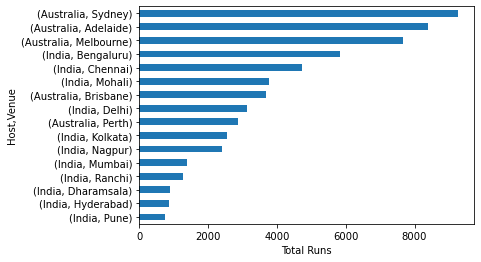

In [20]:
df.groupby(["Host","Venue"])["RUNS"].sum().sort_values().plot(kind="barh")
plt.xlabel("Total Runs")

# Australian Pitches are more Scorable

Text(0.5, 0, 'Total wickets')

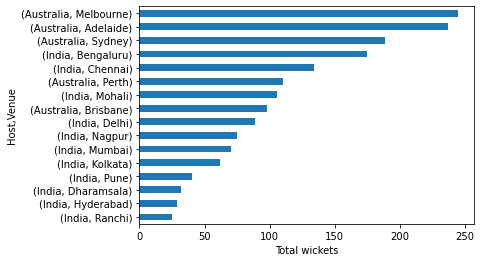

In [21]:
df.groupby(["Host","Venue"])["WICKETS"].sum().sort_values().plot(kind="barh")
plt.xlabel("Total wickets")

# AUSTRALIA TOO HAVE BOWLING PITCHES

Text(0, 0.5, 'Runs')

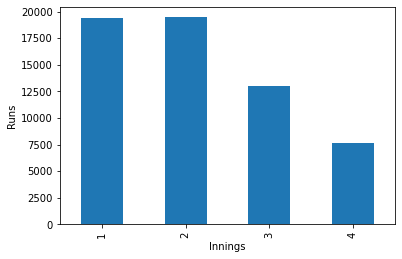

In [22]:
df.groupby("Innings")["RUNS"].sum().plot(kind="bar")
plt.ylabel("Runs")

# Pitches become hard to bat as the time pass

## That's all for the Dataset
# Upvote my Work if you find it useful
# Thanks